In [4]:
%matplotlib inline

import numpy as np
import scipy as sp
import pandas as pd
import sklearn
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score

sns.set_style('whitegrid')

Let's start with reading the input data

In [5]:
wine_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')

In [6]:
print("The 'wine' dataframe has {0} rows and {1} columns".format(*wine_df.shape))
print("\nColumn names are:\n\t"+'\n\t'.join(wine_df.columns))
print("\nFirst 5 rows of the dataframe are:")
wine_df.head()

The 'wine' dataframe has 1599 rows and 12 columns

Column names are:
	fixed acidity
	volatile acidity
	citric acid
	residual sugar
	chlorides
	free sulfur dioxide
	total sulfur dioxide
	density
	pH
	sulphates
	alcohol
	quality

First 5 rows of the dataframe are:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Now we will split the dataframe to feature data (X) and target data (y)

In [7]:
y = wine_df.quality.values
X = wine_df.ix[:,wine_df.columns != "quality"].as_matrix()

Since we want to treat this as a classsification problem, we need to set a threshold for quality, above which we will set the class label to "good" and below it to "poor".

For that, let's see the distribution of quality values within our dataframe.

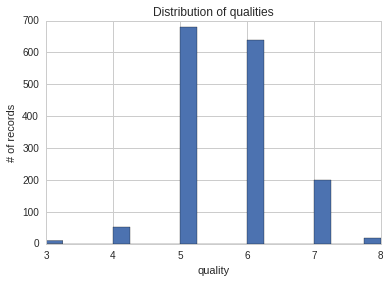

In [8]:
plt.hist(y,20)
plt.xlabel('quality')
plt.ylabel('# of records')
plt.title('Distribution of qualities');

Based on the shown distribution, we will choose 7 as our quality threshold for good wine.

In [9]:
y = [1 if i >=7 else 0 for i in y]

Now let's check the skewness of the dataset

In [10]:
print('Class 0 - {:.3f} %'.format(100*y.count(0)/len(y)))
print('Class 1 - {:.3f} %'.format(100*y.count(1)/len(y)))

Class 0 - 86.429 %
Class 1 - 13.571 %


With this we have also created our *baseline model*, the **base rate classifier**. It simply assigns the most frequent class to all observations and is in this way, in our case, expected to achieve 86.4% accuracy.

All further models must achieve a better accuracy to be accepted.

In [30]:
scores = []

for val in range(1,41):
    clf = RandomForestClassifier(n_estimators = val)
    validated = cross_val_score(clf, X, y, cv = 10)
    scores.append(validated)
    
validated

array([ 0.8757764 ,  0.89440994,  0.84375   ,  0.86875   ,  0.9       ,
        0.825     ,  0.825     ,  0.88050314,  0.89308176,  0.87421384])

(10, 40)


/home/nemanja/anaconda3/lib/python3.5/site-packages/seaborn/categorical.py:2125: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


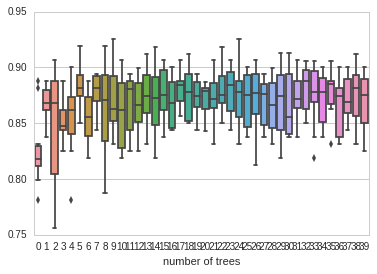

In [42]:
scores_per_fold = pd.DataFrame(scores).transpose()
print(scores_per_fold.shape)

sns.boxplot(scores_per_fold);
plt.xlabel('number of trees')
plt.show()

In [39]:
scores_per_fold.head()

AttributeError: 'function' object has no attribute 'head'